# 5.2

In [ ]:
import torch
import numpy as np

t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

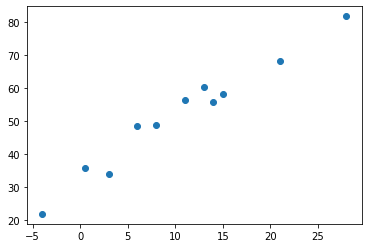

In [ ]:
import matplotlib.pyplot as plt

plt.plot(t_c,t_u,'o')
plt.show()

위 그래프를 통해 선형모델이 가장 적합하다는것을 알 수 있찌만, 답을 모른다고 가정하고 두 측정값 사이에서 변환하는 역할을 해줄 모델중 가장 단순한 선형식을 이용하자.

식은 아래와같다.

$t_c = w*t_u +b$

$w$는 가중치, $b$는 편향값이다.
모델의 파라미터는 $w,b$이고 데이터 기반으로 추정해야 한다. 오차가 최대한 작아지게 만드는 것을 목표로 파라미터를 최적화 시키면된다. 이때 오차측정을 정의하기 위해 손실함수라고 불리는 측정함수를 만든다.

# 5.3

### 손실함수,비용함수 (loss function, cost function)

학습과정이 최소화하고자 하는 단일 값을 계산하는 함수이다.

- MAE: 평균절대오차 ($1/n \sum|x-\bar x|$)
  - 수렴하고자 하는 경우에 미분값을 정의 할 수 없다.
- MSE: 평균제곱오차 ($1/n \sum(x-\bar x)^2$)
  - 최적값에 가까워질수록 이동량이 달라지기 때문에 최솟값 근처에서 더 잘 동작한다.
  - 잘못된 결과에 더 많은 불이익을 준다. 제곱으로 인해 특이값에 영향을 많이 받는다.

In [ ]:
def model(t_u,w,b):
  return w*t_u+b

def loss_fn(t_p,t_c):
  squared_diffs=(t_p-t_c)**2
  return squared_diffs.mean()

# 파라미터 초기화
w=torch.ones(())
b=torch.zeros(())

# 모델호출
t_p=model(t_u,w,b) #브로드캐스팅 사용

t_p


tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [ ]:
loss=loss_fn(t_p,t_c)
loss

tensor(1763.8848)

# 5.4

In [ ]:
delta=0.1
learning_rate=1e-2

#w 최적화
loss_rate_of_change_w = (loss_fn(model(t_u, w+delta, b), t_c)-loss_fn(model(t_u, w+delta, b), t_c)) / (2.0 * delta)
w = w - learning_rate * loss_rate_of_change_w

#b 최적화
loss_rate_of_change_b = (loss_fn(model(t_u, w, b + delta), t_c) - loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)
b = b - learning_rate * loss_rate_of_change_b

이 과정을 반복하면서 손실계산값이 최소로 떨어지는 최적의 파라미터 값으로 수렴하게 하면된다. 지금은 변화율이 심해서 조정할 필요가 있는데 이를 미분값을 이용한다.

In [ ]:
# 미분계산
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)  # <1>
    return dsq_diffs

In [ ]:
# 모델에 미분적용
def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

In [ ]:
# 경사함수 정의
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [ ]:
# 반복훈련
def training_loop(n_epochs,learning_rate,params,t_u,t_c):
  for epoch in range(1,n_epochs+1):
    w,b=params

    t_p=model(t_u,w,b)
    loss=loss_fn(t_p,t_c)
    grad=grad_fn(t_u,t_c,t_p,w,b)

    params=params-learning_rate*grad

    print('epoch %d, loss %f'%(epoch,float(loss)))

  return params

In [ ]:
training_loop(n_epochs=100, learning_rate=1e-2,params=torch.tensor([1.0,0.0]),t_u=t_u,t_c=t_c)

epoch 1, loss 1763.884766
epoch 2, loss 5802484.500000
epoch 3, loss 19408029696.000000
epoch 4, loss 64915905708032.000000
epoch 5, loss 217130525461053440.000000
epoch 6, loss 726257583152928129024.000000
epoch 7, loss 2429183416467662896627712.000000
epoch 8, loss 8125122549611731432050262016.000000
epoch 9, loss 27176882120842590626938030653440.000000
epoch 10, loss 90901105189019073810297959556841472.000000
epoch 11, loss inf
epoch 12, loss inf
epoch 13, loss inf
epoch 14, loss inf
epoch 15, loss inf
epoch 16, loss inf
epoch 17, loss inf
epoch 18, loss inf
epoch 19, loss inf
epoch 20, loss inf
epoch 21, loss inf
epoch 22, loss inf
epoch 23, loss nan
epoch 24, loss nan
epoch 25, loss nan
epoch 26, loss nan
epoch 27, loss nan
epoch 28, loss nan
epoch 29, loss nan
epoch 30, loss nan
epoch 31, loss nan
epoch 32, loss nan
epoch 33, loss nan
epoch 34, loss nan
epoch 35, loss nan
epoch 36, loss nan
epoch 37, loss nan
epoch 38, loss nan
epoch 39, loss nan
epoch 40, loss nan
epoch 41, loss

tensor([nan, nan])

In [ ]:
#params 조정이 너무 커서 loss가 무한값이 되었다. 값이 앞뒤로 진동하면서 조정값이 점점 커지고 다음차례에는 더 심한 과잉교정으로 이어진다. 최적화에 수렴하는 대신 발산해 버린다. learning_rate를 줄여 학습을 해야한다.

def training_loop(n_epochs, learning_rate, params, t_u, t_c,
                  print_params=True):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_u, w, b)  
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)  

        params = params - learning_rate * grad

        if epoch in {1, 2, 3, 10, 11, 99, 100, 4000, 5000}:  # <3>
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            if print_params:
                print('    Params:', params)
                print('    Grad:  ', grad)
        if epoch in {4, 12, 101}:
            print('...')

        if not torch.isfinite(loss).all():
            break  # <3>
            
    return params


training_loop(n_epochs=100, learning_rate=1e-4,params=torch.tensor([1.0,0.0]),t_u=t_u,t_c=t_c)

Epoch 1, Loss 1763.884766
    Params: tensor([ 0.5483, -0.0083])
    Grad:   tensor([4517.2964,   82.6000])
Epoch 2, Loss 323.090515
    Params: tensor([ 0.3623, -0.0118])
    Grad:   tensor([1859.5493,   35.7843])
Epoch 3, Loss 78.929634
    Params: tensor([ 0.2858, -0.0135])
    Grad:   tensor([765.4666,  16.5122])
...
Epoch 10, Loss 29.105247
    Params: tensor([ 0.2324, -0.0166])
    Grad:   tensor([1.4803, 3.0544])
Epoch 11, Loss 29.104168
    Params: tensor([ 0.2323, -0.0169])
    Grad:   tensor([0.5781, 3.0384])
...
Epoch 99, Loss 29.023582
    Params: tensor([ 0.2327, -0.0435])
    Grad:   tensor([-0.0533,  3.0226])
Epoch 100, Loss 29.022667
    Params: tensor([ 0.2327, -0.0438])
    Grad:   tensor([-0.0532,  3.0226])


tensor([ 0.2327, -0.0438])

첫 에포크에서 가중치에 대한 기울기는 편향값에 대한 기울기 보다 50배나 큰것을 볼 수 있다. 가중치와 편향값의 범위가 달라 이런경우 하나를 조정하기에 적절한 크기의 학습률은 동시에 다른값의 업데이트를 불안정하게 만들 수 있다. 따라서 파라미터별로 다른 학습률을 사용해야하지만 파라미터가 많은 모델의 경우 매우 성가시게 된다. 따라서 입력값을 변경해 기울기가 큰 차이가 나지 않게 해야한다. 입력값의 범위가 -1.0 ~ 1.0 을 벗어나게 하지 않기 위해 t_u에 0.1을 곱해준다.

In [ ]:
t_un=0.1*t_u
training_loop(n_epochs=100, learning_rate=1e-2,params=torch.tensor([1.0,0.0]),t_u=t_un,t_c=t_c)
#이제 학습률을 1e-2로 해도 발산ㄴ하지 않는다.

Epoch 1, Loss 80.364342
    Params: tensor([1.7761, 0.1064])
    Grad:   tensor([-77.6140, -10.6400])
Epoch 2, Loss 37.574913
    Params: tensor([2.0848, 0.1303])
    Grad:   tensor([-30.8623,  -2.3864])
Epoch 3, Loss 30.871077
    Params: tensor([2.2094, 0.1217])
    Grad:   tensor([-12.4631,   0.8587])
...
Epoch 10, Loss 29.030489
    Params: tensor([ 2.3232, -0.0710])
    Grad:   tensor([-0.5355,  2.9295])
Epoch 11, Loss 28.941877
    Params: tensor([ 2.3284, -0.1003])
    Grad:   tensor([-0.5240,  2.9264])
...
Epoch 99, Loss 22.214186
    Params: tensor([ 2.7508, -2.4910])
    Grad:   tensor([-0.4453,  2.5208])
Epoch 100, Loss 22.148710
    Params: tensor([ 2.7553, -2.5162])
    Grad:   tensor([-0.4446,  2.5165])


tensor([ 2.7553, -2.5162])

In [ ]:
params = training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_un, 
    t_c = t_c,
    print_params = False)

params
#정확한 값은 w=5.5556, b=-17.7778이고 거의 일치하는것을 볼수 있다.

Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574913
Epoch 3, Loss 30.871077
...
Epoch 10, Loss 29.030489
Epoch 11, Loss 28.941877
...
Epoch 99, Loss 22.214186
Epoch 100, Loss 22.148710
...
Epoch 4000, Loss 2.927680
Epoch 5000, Loss 2.927648


tensor([  5.3671, -17.3012])

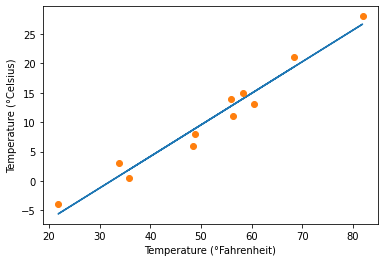

In [ ]:
t_p = model(t_un, *params)  # model(t_u,w,b): return w*t_u+b 단위를 모르는 값을 정규화하여 훈련하고 인자도 언패킹한다.

plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy()) #원본 값
plt.plot(t_u.numpy(), t_c.numpy(), 'o') #관측된 값
plt.show()

# 5.5

복잡한 선형 비선형 합성 함수의 미분에 대해 해석가능한 표현식을 작성하는것은 쉽지않기때문에 파이토치는 자동미분 기능을 제공한다. 파이토치 텐서는 어디로부터 왔는지 어느텐서에서 어떤 연산을 수행해서 만들어진 텐서인지 기억하고 있기때문에 미분을 최초입력까지 연쇄적으로 적용해 올라갈 수 있다.

In [ ]:
# 자동미분적용
def model(t_u,w,b):
  return w*t_u+b

def loss_fn(t_p,t_c):
  squared_diffs=(t_p-t_c)**2
  return squared_diffs.mean()

params=torch.tensor([1.0,0.0], requires_grad=True) #w,b 초기화시에 params에 가해지는 연산의 결과로 만들어지는 모든 텐서를 이은 전체 트리를 기록하는것을 요청.
#즉 params를 조상으로 두는 모든 텐서는 params로 부터 해당텐서가 만들어지기 까지 그 사이에 있는 모든 함수에 접근할 권한을 가진다.

In [ ]:
params.grad is None #모든 파이토치텐서는 grad속성은 가지도 값은 None임

True

In [ ]:
# 미분속성사용
# 모델을 호출해 손실값을 구한 뒤 loss텐서에 대해 backward호출

loss = loss_fn(model(t_u, *params), t_c)
loss.backward()

params.grad #loss함수를 w와 b로 편미분 했을때 gradient값을 알 수 있다.

tensor([9034.5938,  165.2000])

In [ ]:
# 미분 함수 누적하기
# 연쇄적으로 연결된 함수들을 거쳐 손실에 대한 미분을 계산하고 값을 텐서의 grad속성에 누적한다.
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:  # backward호출전에 아무위치에 두면된다.
            params.grad.zero_()
        
        t_p = model(t_u, *params) 
        loss = loss_fn(t_p, t_c)
        loss.backward()
        
        with torch.no_grad():  #gradient계산 잠깐 멈춤
            params -= learning_rate * params.grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

##### backward호출은 미분을 말단 노드에 누적시킨다. 앞서 backward가 호출되었다면 손실이 다시 계산되고 backward가 다시 호출되고 말단 노드의 기울기 값이 이전 반복문 수행시 계산 되었던 기존값에 누적되어 부정확한 기울기값을 초래한다. 따라서 파라미터 조정을 위해 사용후에는 기울기를 다시 0으로 초기화 시켜야 한다. 

In [ ]:
training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0], requires_grad=True),
    t_u = t_un,
    t_c = t_c)

Epoch 500, Loss 7.860115
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)

In [ ]:
# 경사하강법 이외의 다양한 옵티마이저
import torch.optim as optim

dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

모든 옵티마이저 생성자는 첫번째 입력으로 파라미터 리스트(requires_grad=True인)를 받는다.

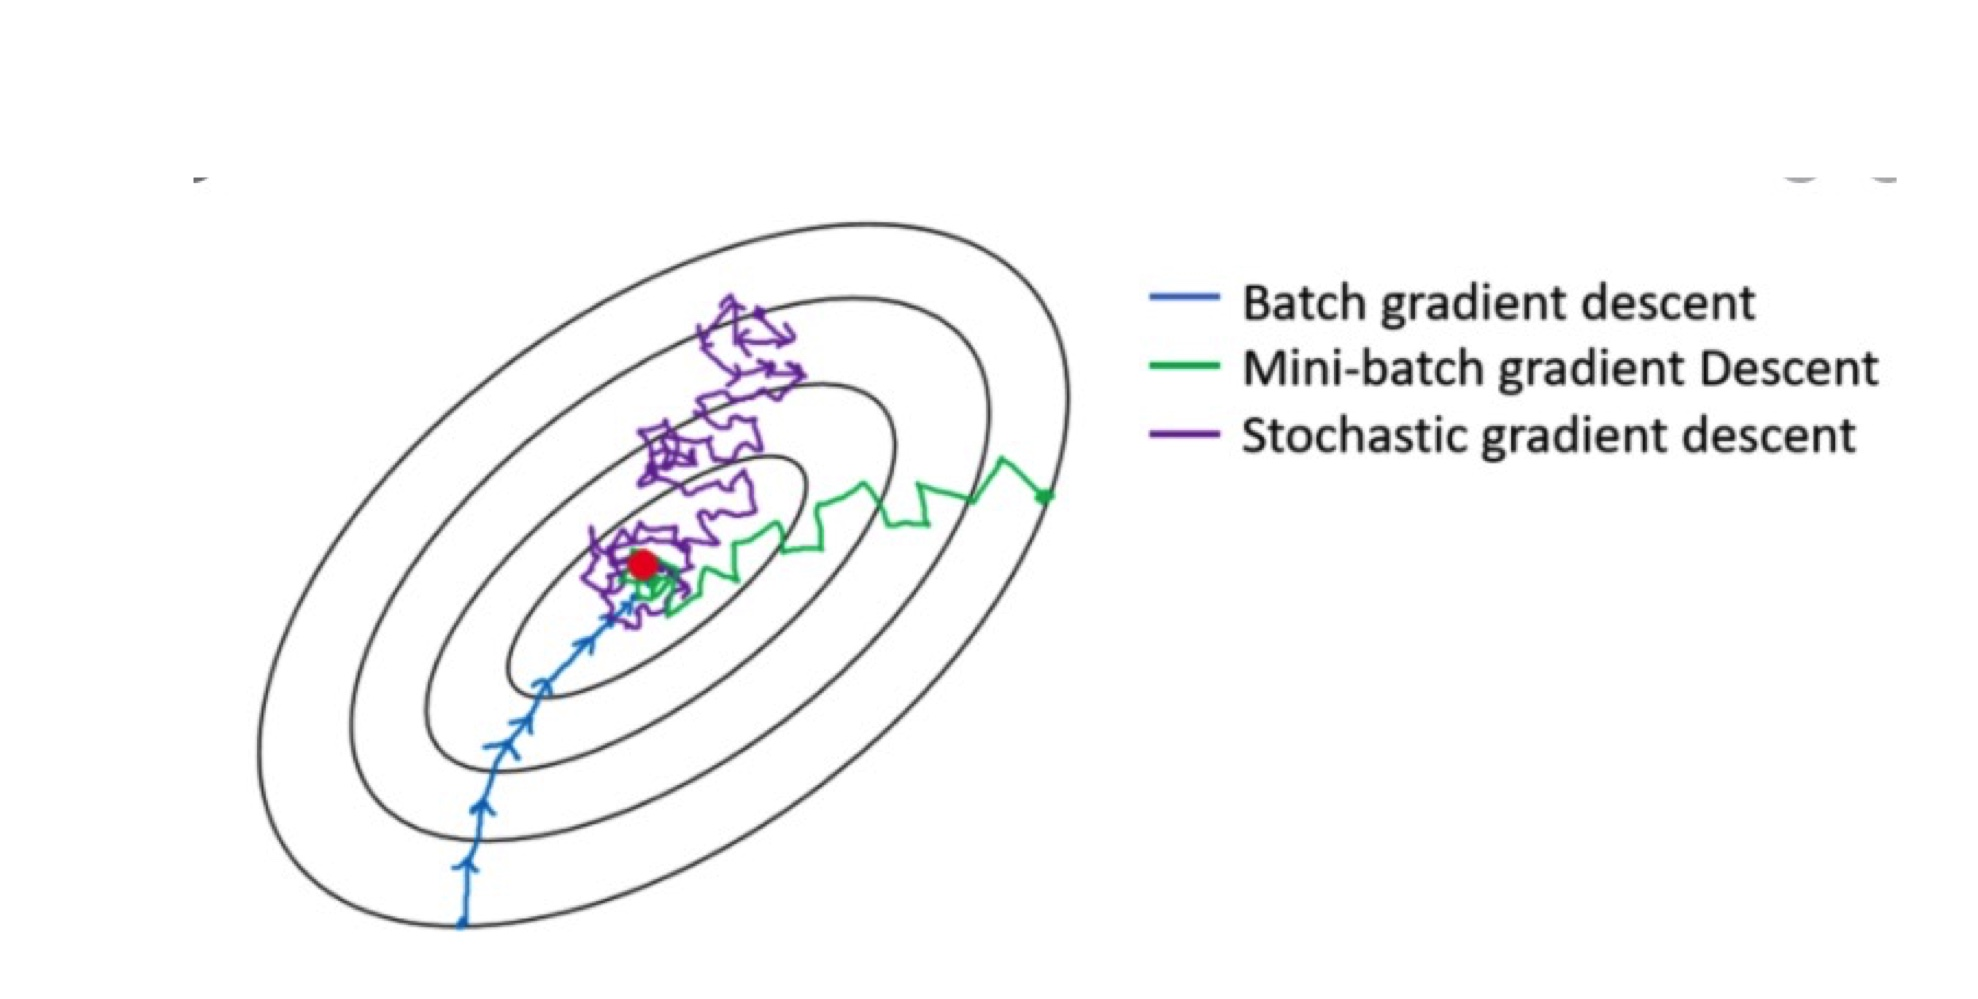
### Gradient descent vs Stochastic gradient descent vs mini-batch gradient

batch gradient descent: 배치사이즈가 n으로 파라미터 업데이트를 n개 단위로 한꺼번에 진행, 비효율적이지만 안정적임

stochastic gradient descent: 배치사이즈가 1로 파라미터 업데이트를 1개마다 진행, 실시간 업데이트가 가능하지만 불안정함

mini-batch gradient descent: 배치사이즈가 1 ~ n 사이로 업데이트를 n/batchsize 마다 진행




In [ ]:
# 경사하강 옵티마이저 사용 

params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-5

optimizer = optim.SGD([params], lr=learning_rate)
t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)

loss.backward()

optimizer.step() #파라미터 업데이트를 step호출을 통해 조정한다.

params

tensor([ 9.5483e-01, -8.2600e-04], requires_grad=True)

In [ ]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

t_p = model(t_un, *params)
loss = loss_fn(t_p, t_c)

optimizer.zero_grad() # 0으로 초기화 필수
loss.backward()
optimizer.step()

params

tensor([1.7761, 0.1064], requires_grad=True)

In [ ]:
# 훈련루프
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params) 
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [ ]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate) 

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params, 
    t_u = t_un,
    t_c = t_c)

Epoch 500, Loss 7.860120
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)

In [ ]:
# 다른 옵티마이저 테스트해보기
params = torch.tensor([1.0,0.0],requires_grad=True)
learning_rate=1e-1
optimizer=optim.Adam([params],lr=learning_rate)

training_loop(
    n_epochs = 2000, 
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_c)

Epoch 500, Loss 2.962302
Epoch 1000, Loss 2.927647
Epoch 1500, Loss 2.927645
Epoch 2000, Loss 2.927646


tensor([  5.3677, -17.3048], requires_grad=True)

In [ ]:
# Regularization: 손실함수에 페널티항을 두어 모델의 피팅이 더 천천히 부드럽게 만들어지도록 한다. 입력샘플에 노이즈를 더하는 방법도 있다.


# 데이터셋 나누기
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples) #randperm함수는 색인 순열을 찾기위해 텐서 요소를 섞었을때의 인덱스 리스트를 반환한다.

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices  # 랜덤인 인덱스값이 나옴

(tensor([0, 6, 1, 5, 4, 2, 7, 3, 8]), tensor([ 9, 10]))

In [ ]:
# 훈련셋과 검증셋 생성
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [ ]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u,
                  train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params) 
        train_loss = loss_fn(train_t_p, train_t_c)
                             
        val_t_p = model(val_t_u, *params) 
        val_loss = loss_fn(val_t_p, val_t_c)
        
        optimizer.zero_grad()
        train_loss.backward() # 검증셋은 학습시키면 안되므로 train_loss만 backward호출한다.
        optimizer.step()

        if epoch <= 3 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                  f" Validation loss {val_loss.item():.4f}")
            
    return params

In [ ]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un, # 
    val_t_u = val_t_un, # 여기서 SGD를 이용하므로 정규화된 입력을 사용한다.
    train_t_c = train_t_c,
    val_t_c = val_t_c)

Epoch 1, Training loss 70.5623, Validation loss 124.4736
Epoch 2, Training loss 40.3757, Validation loss 51.5750
Epoch 3, Training loss 34.2207, Validation loss 30.3821
Epoch 500, Training loss 7.1204, Validation loss 6.4052
Epoch 1000, Training loss 3.4128, Validation loss 4.2236
Epoch 1500, Training loss 2.8828, Validation loss 3.7480
Epoch 2000, Training loss 2.8070, Validation loss 3.6181
Epoch 2500, Training loss 2.7962, Validation loss 3.5761
Epoch 3000, Training loss 2.7946, Validation loss 3.5612


tensor([  5.3306, -17.0593], requires_grad=True)

In [ ]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u,
                  train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)

        with torch.no_grad(): # 필요하지 않을때 자동미분을 끄는 기능. 큰모델의 경우 메모리 사용절감등 유의미한 이득을 볼 수 있다.
            val_t_p = model(val_t_u, *params)
            val_loss = loss_fn(val_t_p, val_t_c)
            assert val_loss.requires_grad == False # 이 블록 내에서는 False로 설정을 강제한다는 상황을 점검.
            
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

In [ ]:
def calc_forward(t_u, t_c, is_train):
    with torch.set_grad_enabled(is_train): #autograd를 켤지 끌지를 제어할 수 있다. 훈련모드인지 추론모드인지 나타낸다.
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
    return loss